# What is GIS?

GIS, short for Geographic Information Systems, is the name given to the analysis of data that includes *geospatial* information. Often times, GIS data will look very much like data that you're used to -- e.g. it may come in the form of a tabular data set where each row is a different observation and each column is a different variable -- but with the addition of information about a location or region associated with each observation. 

GIS data comes in two main flavors: vector data and raster data. 

## Vector Data

Vector data is data where the geospatial information comes in the form of geometric shapes -- points, lines, or polygons -- associated with each observation in a dataset. Vector data is extremely common when data is about specific locations like stores, customers, etc. (points); about roads, rivers, or routes (lines); or administrative boundaries like media markets, or political boundaries (polygons). 

For example, one common form of GIS data you may come across may consist of information on the demographic characteristics of different countries (income, population, growth rate, etc.). Like most tabular data you work with, you could open up this data in an Excel spreadsheet and see that each row is a different neighborhood, and each column is another variable.

In addition to this tabular data, however, a GIS data set will also include geographic information about each row in the data set -- for example the borders of each country.

In fact, because vector data can be thought of as a tabular data set + geographic data for each row means that and Python we can represent it as a regular pandas DataFrame with an extra column that stores the geographic information for each row. This allows us to do all the things were used to doing with pandas (subsetting based on column values, merging, sampling, etc.), *plus* do manipulations based on the spatial relationships implied by this geographic data!

To illustrate, here's a simple vector dataset of all the countries in the world. Initially, you can see it basically just looks like a regular pandas DataFrame, except that it has a `geometry` column at the end full of `POLYGON` and `MULTIPOLYGON` objects. 

In [1]:
import geopandas as gpd
import numpy as np

# Load GIS data
# (this is a dataset that of countries that
# comes packaged with geopandas)
world = gpd.read_file(
    "https://github.com/nickeubank/practicaldatascience_book/raw/refs"
    "/heads/main/notebooks/gis/example_data/world_countries/world_countries_mercator.geojson"
)
# Inspect.
world.sample(5)

,featurecla,scalerank,labelrank,sovereignt,sov_a3,adm0_dif,level,type,tlc,admin,...,fclass_tr,fclass_id,fclass_pl,fclass_gr,fclass_it,fclass_nl,fclass_se,fclass_bd,fclass_ua,geometry
101,Admin-0 country,1,3,Nepal,NPL,0,2,Sovereign country,1,Nepal,...,None,None,None,None,None,None,None,None,None,"POLYGON ((9809522.588 3233417.414, 9800916.707..."
133,Admin-0 country,1,3,Ireland,IRL,0,2,Sovereign country,1,Ireland,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-689945.39 7145114.483, -671588.863 ..."
38,Admin-0 country,1,3,Guatemala,GTM,0,2,Sovereign country,1,Guatemala,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-10266746.168 1636108.451, -10264016..."
148,Admin-0 country,1,3,Malaysia,MYS,0,2,Sovereign country,1,Malaysia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((11141495.49 721155.334, 111608..."
90,Admin-0 country,1,3,Cambodia,KHM,0,2,Sovereign country,1,Cambodia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((11419702.448 1366951.506, 11393338.3..."




But unlike a normal DataFrame, we can also use the associated `geometry` column to do fun things, like plot the world!

<Axes: >

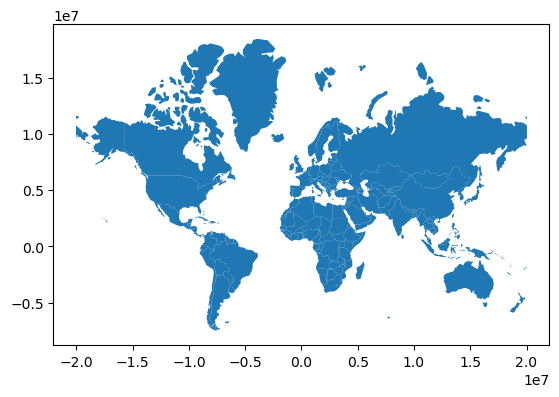

In [2]:
world.plot()

And of course, we can combine these two sources of information -- here's a bit of code to calculate the area of each country, divide population by area to get population density, then make a map colored by population density: (don't worry about understanding the error message below -- it's important, but it's not something we'll get to till our second reading):

<Axes: >

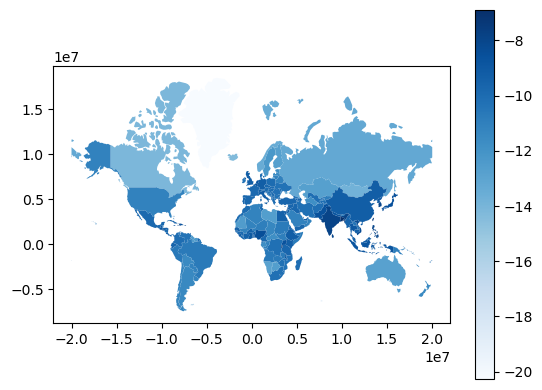

In [3]:
# Make Pop Density and plot
world["pop_density"] = np.log(world["pop_est"] / world.area)
world.plot("pop_density", cmap="Blues", legend=True)

## Raster Data

The other common form of GIS data is raster data, which is how we store things like satellite photos, or satellite radar scans of elevation. Unlike vector data -- which usually consists of tabular data with geometric shapes associated with each observation -- raster data will generally come to you as an image file with some associated data about how each pixel lines up with a location on the Earth. 

Why is raster data stored as an image file? Because raster data is often the output of a camera, or something that works *like* a camera (e.g. a radar scanner) that collects data about regularly spaced points (pixels) across a scanned region.

For example, here's a raster dataset of air pollution across the city of New York:

/users/nce8/miniforge3/envs/geo/lib/python3.13/site-packages/matplotlib/colors.py:778: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


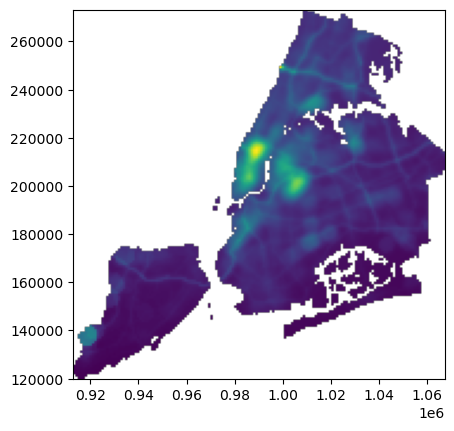

<Axes: >

In [4]:
import rasterio
from rasterio.plot import show

ny = rasterio.open(
    "https://github.com/nickeubank/practicaldatascience_book/"
    "raw/refs/heads/main/notebooks/gis/example_data/ny_raster/hdr.adf"
)
show(ny)

While raster data is "spatial" in the sense that raster data includes information about the location on the Earth associated with each data point, the defining feature of raster data is that it is composed of a collection of data points organized in a regular grid (like a photo). And when you hear about data organized in a regular grid, what comes to mind? That's right -- a matrix! Indeed, under the hood, raster data is stored in Python as numpy arrays:

In [5]:
ny.read(1)

array([[-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
        -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
       [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
        -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
       [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
        -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
       ...,
       [ 5.3983607e+00,  5.3768501e+00,  5.3942971e+00, ...,
        -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
       [-3.4028235e+38,  5.3669605e+00,  5.3665938e+00, ...,
        -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
       [-3.4028235e+38, -3.4028235e+38,  5.3590460e+00, ...,
        -3.4028235e+38, -3.4028235e+38, -3.4028235e+38]],
      shape=(156, 157), dtype=float32)

In [6]:
type(ny.read(1))

numpy.ndarray

So while vector data is stored as tabular datasets with a single column containing geometric objects and information about how the x-y coordinates of those objects relate to locations on the Earth, raster data is stored as numpy arrays with some associated information about how different values in the array relate to locations on the Earth.

## Why Do We Want GIS Data?

Now you that you have a bit of a feel for what GIS data looks like, you may be asking yourself "ok, but why is it useful to have geospatial data associated with your data? Here's just a handful of reasons that we'll explore more in the coming days:

- **It's the only way to measure things we couldn't measure otherwise:** Suppose you want to know about air quality or surface temperature *for the entire planet*? How do you measure that? Well, with satellites of course! But if you get data from a satellite pointing an instrument at the Earth, GIS is the only way to do anything useful with it. On their own, the readings from satellite instruments are just a series of pictures taken at different times; it's only when we're able to map specific pixels to specific locations on the earth that we can begin the use them to better understand the world. For example, suppose you have a satellite that measures air pollution -- if you can't match readings with specific cities / factories / communities, there's not much you can do with it!
- **Measuring Spatial Relationships:** Often times we want spatial data because we're explicitly interested spatial relationships. For example, suppose you have a dataset of possible locations for new stores -- how far are each of those possible locations from your existing stores (whose sales they might cannibalize?) or the stores of competitors (who might steal your sales away)? Or how far are each of those locations from the nearest supply depot? Those are fundamentally spatial questions that we can only answer with spatial data.
- **Connecting Datasets**: I'm a firm believer that one of the best sources of insights in data science is just by merging previously disconnected data sets. For example, merging data on prescription opioid drug shipments and data on drug overdoses makes it possible to understand the role of legal opiates in driving drug overdoses in a way that might otherwise be impossible without complicated clinical studies. *Most* of the time, though, datasets don't come with common identifiers you can use for merging. But this is where GIS comes in -- ***any* GIS data can be related to any other GIS data!** For example, if you have data from the US Census Bureau on average incomes in different neighborhoods, then you can combine it with a dataset on possible store locations to answer the question "what is the average income of people within 3 miles of this possible location?"
- **Spatial Interpolation:** Suppose you have data on soil quality measured at a handful of random points, and you want to try and estimate what soil quality may look like at a location between the points you've measured (say, to help a builder decide on the type of foundation they need to build). With spatial interpolation, you can model of soil quality over the entire area from which you got a few discrete measurements! (This is the kind of thing people in the oil and mineral business do a lot -- you collect data from a handful of wells, then try and interpolate what's going on between them. Indeed, this type of oil and mineral exploration is probably one of the biggest drivers of GIS technology.)
- **Modelling Spatial Correlations:** In *most* of life, things that are close to one another will tend to have correlated outcomes. There's an entire discipline of spatial statistics that tries to model spatial correlations, and use that information to improve the efficiency of standard statistical modelling strategies. Want to estimate the value of a house? You'd better more than its square footage -- you also need to know the prices of similar houses that have sold recently *and* whether those houses were in the same neighborhood as your target house!

Finally, it's also worth pausing to note the range of *domains* in which these tricks can be used. For example, sports analytics! The same tools that measure whether fire stations are near fires can also be used to identify whether corner backs are near wide receivers on a field -- measuring the spatial relationship between objects is the same whether it's at the level of cities or a field. Indeed, GIS is used in warehouses to locate products on shelves, and to look at average distances between workings moving around and the things they're trying to pick up, and at archeological digs to map out artifacts. So while most examples we'll use here will be looking at larger geographies, keep in mind the tools we're using can be used to analyze spatial relationships on any scale. 

## What Comes Next

As you can see from the discussion above, GIS / spatial analysis is a huge specialization, and we won't be able to learn every spatial analysis technique in this class. If you're a Duke MIDS student, then working with raster data is something you'll learn a lot about in your machine learning course, IDS 705 -- that's both because working with raster data often comes down to doing image processing (since rasters are basically just images), and also because working with satellite imagery is Kyle Bradbury's specialty. 

With that in mind, in this class we'll just focus on vector data. In the next few readings and lessons, we'll ensure that when you leave this class, you can:

- Recognize the main kinds of geospatial data, and know what libraries to use to work with them,
- Load, manipulate, and visualize (map) vector data with geopandas,
- Understand how we represent locations on the three-dimensional Earth in two-dimensional plots,
- Merge GIS datasets based on their spatial relationships
- Understand what can be done with GIS data so that you can recognize situations in which GIS is the right tool to use, know where to go to learn more.